In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (12,12)
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('data/Cleaned.csv')

In [47]:
df.columns

Index(['Profession', 'Country', 'Region', 'Education', 'Sex', 'Age', 'AgeBin',
       'Maritial', '1.1_HeardCovid', '1.2_Television/Radio',
       '1.2_Newspaper/Magazines', '1.2_SocialMedia',
       '1.2_Colleagues/Workplace', '1.2_Neighbors', '1.3_CovidKnowledgeLevel',
       '1.4_ContactRespiratoryDrop', '1.4_Touching', '1.4_UseSameObject',
       '1.4_Sex', '1.4_PersonToPerson', '1.4_CloseContact', '1.4_TouchingCoin',
       '1.4_CovidFloatOnAir', '1.5_Fever', '1.5_Tiredness', '1.5_Cough',
       '1.5_ShortnessBreath', '1.5_AchesPain', '1.5_NasalCongestion',
       '1.5_RunningNose', '1.5_SoreThroat', '1.5_Diarrhea', '1.6_Mask',
       '1.7_IncubationPeriod', '1.8_Vaccine', '1.9_LockDown', '1.9_Isolation',
       '1.9_Quarantine', '1.10_Over60Yr', '1.10_PrexistingCond',
       '1.10_WorkEnvo', '1.10_RiskZone', '2.1_LockDown', '2.2_HomeQuarantine',
       '2.3_Isolation', '2.4_PersonalHygiene', '2.5_MediaRole', '2.6_Over60Yr',
       '2.6_PreExisting', '2.6_Working', '2.6_RiskZone',

In [42]:
df['3.10_TimeSpentOnCovidNews'].value_counts()


1    1372
2     631
3     504
4     303
5     221
Name: 3.10_TimeSpentOnCovidNews, dtype: int64

In [35]:
df.AgeBin.value_counts().sum()

3031

In [41]:
#Ref  https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/older-adults.html
bins = pd.IntervalIndex.from_tuples([(0,30),(30,40),(40,50),(50,64),(64,np.inf)])
df['AgeBin'] = pd.cut(df.Age,bins)
df.AgeBin.value_counts()

(0.0, 30.0]     1820
(30.0, 40.0]     588
(40.0, 50.0]     312
(50.0, 64.0]     277
(64.0, inf]       34
Name: AgeBin, dtype: int64

In [20]:
from scipy import stats
def chi_squared_test(df,column1,column2,prob=0.95):
#     print(df.shape)
    contingency_table = pd.crosstab(df[column1],df[column2])
#     print(contingency_table)
    stat,p,dof,expected = stats.chi2_contingency(contingency_table)
    critical = stats.chi2.ppf(prob,dof)
    return country, stat,critical

In [44]:
countries = df.Country.value_counts().index[:8].tolist()
countries

['China',
 'Mexico',
 'Bangladesh',
 'United States',
 'Pakistan',
 'Malaysia',
 'Japan',
 'Zambia']

In [25]:
results = []
for country in countries:
    df_test = df[df['Country'] == country]
    results.append(chi_squared_test(df_test,'','PsychologicalHeath'))
output = pd.DataFrame(results, columns = ['Country','Value', 'Critical'])

In [26]:
output['Significant'] = output['Value'] > output['Critical']
output

,Country,Value,Critical,Significant
0,China,23.552714,31.410433,False
1,Mexico,37.207165,31.410433,True
2,Bangladesh,18.358428,31.410433,False
3,United States,26.141144,31.410433,False
4,Pakistan,36.727583,31.410433,True
5,Malaysia,21.632137,31.410433,False


<AxesSubplot:xlabel='Sex'>

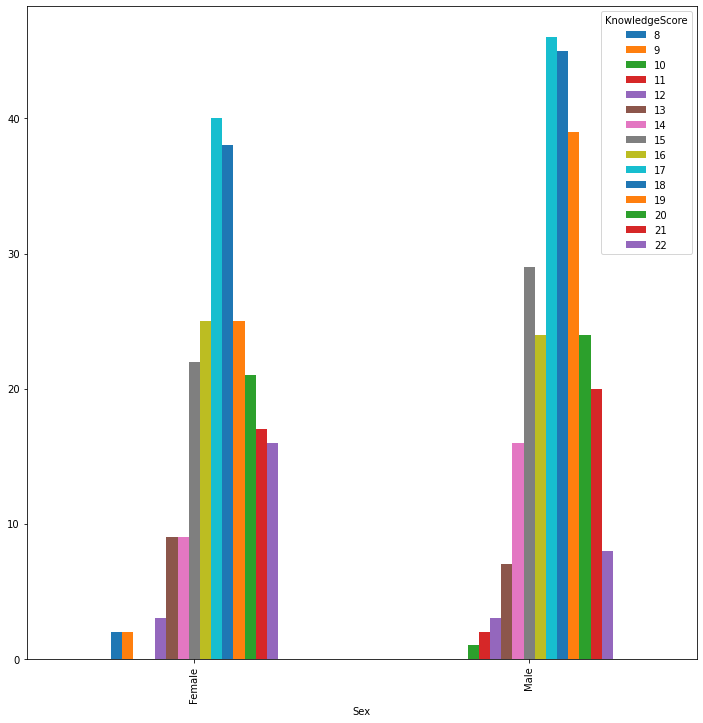

In [16]:
df_test = df[df['Country'] == 'Bangladesh']
contingency_table = pd.crosstab(df_test['Sex'],df_test['KnowledgeScore'])
contingency_table.plot.bar(stacked=False)

<h1> RAW Stuffs </h1>

In [95]:
df['1.3_CovidKnowledgeLevel'].value_counts()

1.0    1814
3.0     669
4.0     266
5.0     244
2.0      38
Name: 1.3_CovidKnowledgeLevel, dtype: int64

<AxesSubplot:xlabel='1.3_CovidKnowledgeLevel'>

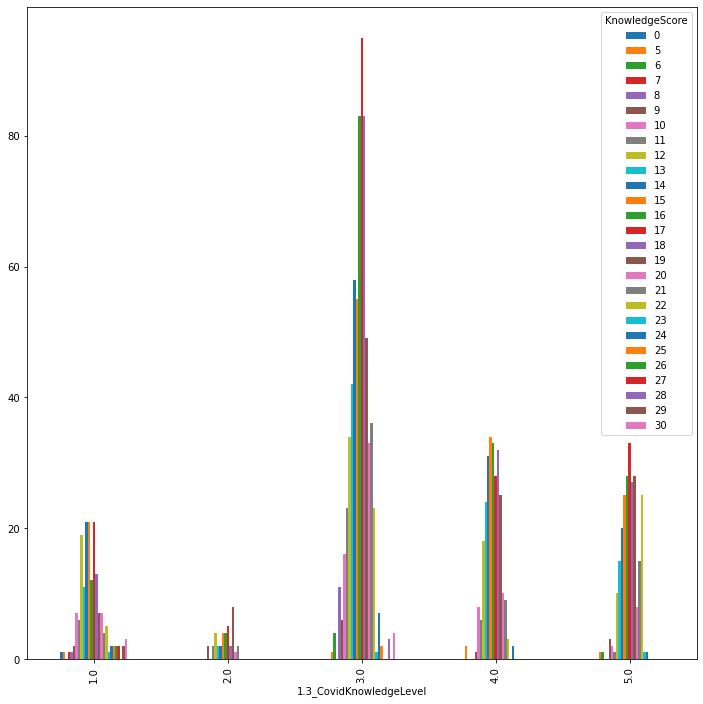

<AxesSubplot:title={'center':'Lockdown'}, xlabel='[sex]'>

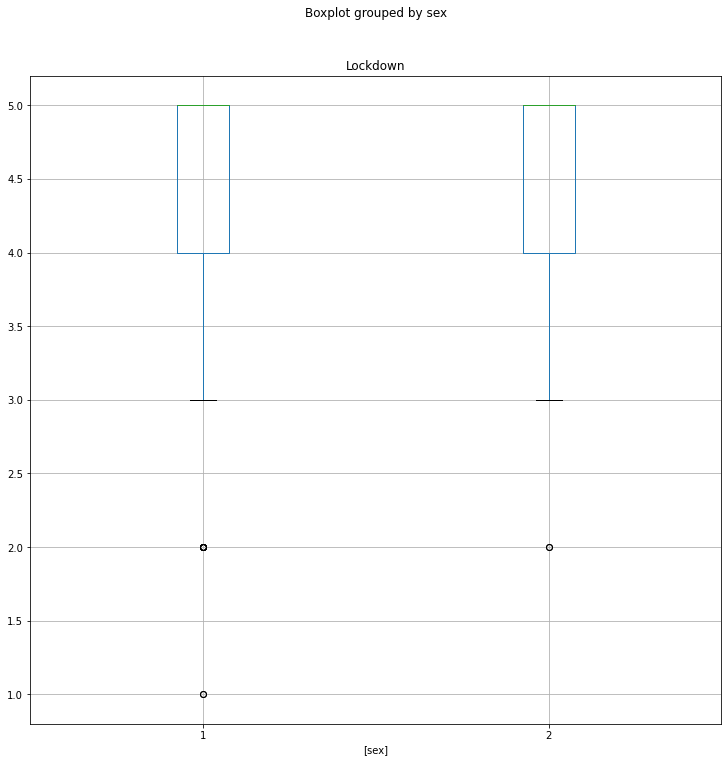

In [139]:
df_test.boxplot(column=['Lockdown'],by=['sex'])